# Práctica Tema 4: Aprendizaje automático


## Sistemas Inteligentes 

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. 

Los ejercicios propuestos se resolverán en este mismo notebook que se entregara en la tarea de entrega habilitada en el Campus  Virtual.

__Lo primero que tenéis que hacer es ejecutar los notebooks para familiarizados con las librerías numpy, pandas y sklearn y con los procesos de carga, análisis y visualización de datos__

En esta práctica se os pide replicar estos procesos C, construir modelos con otros datos. Lo más importante en esta práctica es el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No cuenta para nada poner los trozos de código o gráficas sin explicación__.

Para que los resultados no varíen entre distintas ejecuciones recuerda establecer el parámetro `random_state` para que tenga el mismo valor en todas las funciones que tomen decisiones aleatorias.

__Número de grupo: 17__

__Nombres de los estudiantes: Andrés Salazar Colina__

# Parte 1: Clustering

In [1]:
RANDOM_STATE=333

In [2]:
#pip install -U scikit-learn

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países indicando index_col=0 al leer el archivo csv. 
Echa un vistazo a los datos, verás que todos los datos son numéricos menos la Región. Elimina con la operación drop la columna `Region` por ser categórica. 
Elimina todas las filas en las que faltan valores usando la operación `dropna`.
Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [3]:
import pandas as pd


In [4]:
CoW_csv = pd.read_csv('countries_of_the_world.csv', index_col=0)


In [5]:
CoW_csv.head(10)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547


In [6]:
CoW_csv = CoW_csv.drop(['Region'], axis=1)


In [7]:
CoW_csv.head(10)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
Angola,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
Argentina,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547


In [8]:
CoW_csv = CoW_csv.dropna(axis=0)

In [9]:
CoW_csv

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


In [10]:
CoW_csv.shape

(179, 18)

#### El Dataframe tiene 18 columnas/variables x 179 países, por lo que tiene 3,222 datos

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...). 

Utiliza describe() para calcular los estadísticos, corr() para calcular los coeficientes de correlación y la librería seaborn para dibujar (pairplot) el diagrama de dispersión (tipo kde)

In [11]:
subCoW = CoW_csv.loc[:, ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']]

In [12]:
subCoW

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


    1) `GDP ($ per capita)` es Gross Domestic Product, creo que es el monto que producen las empresas (privadas y publicas) del país sin descontar los taxes. 
    2) `Literacy (%)` determina la población que sabe leer y escribir en el país
    3) `Phones (per 1000)`, asumo que se refiere a cuantos telefonos hay en un promedio de 1000 personas
    4) `Agriculture`, asumo que se refiere al porcentaje del area de agricultura del país
    5) `Industry`, asumo que se refiere al porcentaje del sector industrial del país
    6) `Service`, asumo que se refiere a que porcentaje del sector de servicios tiene el país

In [13]:
subCoW.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Analisis
La primera fila, `count`, solo nos cuenta que hay 179 países en la data. Cosa que ya se sabía.

La segunda fila, `mean`, nos da la información de la media de cada variable teniendo en cuenta todos los países (las siguientes también). Cabe destacar que la media de `Literacy` es del __81.9%__ lo que quiere decir que el __18.1%__ de la población restante de todos los países son analfabetas. Según la desviación típica (`std`), esto se puede confirmar ya que al tener un valor bajo, significa que la mayor parte de los datos van a agruparse cerca de la media, por lo que la mayoría de los países pueden leer y escribir. El mínimo es de un __17%__ mientras que el máximo es de __100%__, sin embargo se puede apreciar que tanto el __50%__ y __75%__ son valores por encima de la media, lo que quiere decir que a pesar de que varios países tienen una taza muy alta de gente que no sabe leer ni escribir, son un grupo en la minoría. A este punto no se que relevancia tiene esta información, pero se se nota desde una perspectiva de comercio, y dicho producto involucra la lectura/escritura, entonces debería ser accesible a muchas más personas de las que no.

En contraste, la media de las personas que tienen un telefono (asumo celular/móvil) según `Phones (per 1000)` es muy baja considerando la "pool" de 1000 individuos. Esto significa que de 1000 personas, __792__ no tiene un móvil y tanto el __50%__ como el __25%__ están por debajo de la media. 

Se puede argumentar basandose en estos datos que mientras más personas sepan leér y escribir, estos son más probables a tener un móvil (se puede inferir que son individuos con una edad relativamente jóven, pero como no se nos dan los datos no se puede decir concretamente) debido a que su país está más orientado a las areas de __servicios__ he __industria__ que __agricultura__. Los datos de los primeros dos son importantes ya que nos da una percepción de la tendencia que predomina en la industria de muchos países y que son la fuente predominante del alto monto del __GDP__. Tan solo el sector de servicio equipara el __55.4%__ de los negocios de todos los países según la media, incluso en el país con un __GDP__ `minimo` de __500__ y un nivel de `Literacy` del __17%__, el sector de servicio equipara un __6.2%__, y aún así es mucho más que los otros sectores, por lo que se puede inferir que los ingresos de dicho país son empujados casi en su totalidad por esto.

Percivo que esta data refleja la actual tendencia/transición de trabajos de labor manual a trabajos que están orientados o incorporados de alguna forma con la tecnología, ya que esta les permites a distintas empresas realizar comercio mediante la globalización que cosas como el internet son capaces de proveer. 

In [14]:
import seaborn as sns


In [15]:
subCoW.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


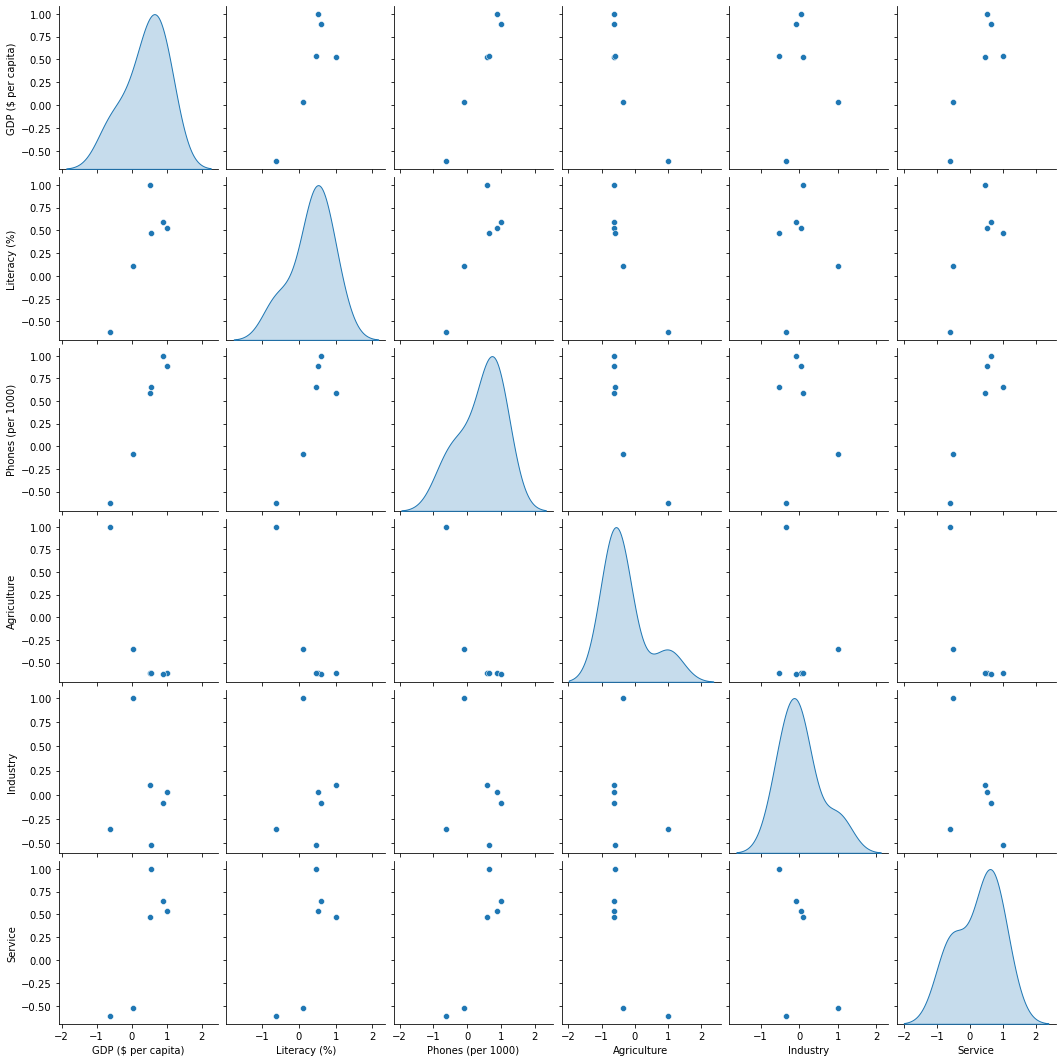

In [16]:
sns.pairplot(subCoW.corr(), diag_kind="kde")

### Analisis

Lo que se puede distinguir más, o por lo menos como yo lo veo, es el "comportamiento" o "tendencia" del `GDP`. Esto se debe a que a medida que el `GDP` se aproxima a su valor maximo, el resot de las variables excepto por agricultura también tienden a incrementar. No podemos ver que la mayoría se involucren en tantos grupos como se quisiera, pero se puede inferir la tendencia de cada uno. Por ejemplo, `agriculture` tiende a incrementar cuando el `GDP` es bajo, pero decrementa cuando es lo contrario, como se puede observar a aquel punto en el __1.00__ y se compara con la posición inicial del grafo de `agriculture`. Por otro lado, los tres sectores tienden a decrementarse cuando algún otro incrementa, lo que significa que dichos países le hacen enfasis a un solo sector. 

Como yá mencioné, los datos están dispersos y no se puede notar muy bien como estos se agrupan, pero si tuviese que apróximar, diría que cada grupo o conjunto de datos se agruparían mejor en 3 clusters al considerar los espacios entre los pocos grupos que se pueden apreciar; el mostrar los datos obtenidos de esta forma ayuda a mi suposición de las tendencias actuales

## 3) Preprocesar los datos

Vamos a utilizar los algoritmos jerárquico aglomerativo y k-Means para encontrar grupos de países similares. 
k-means es muy sensible a las escalas, por lo que vamos a ajustar las escalas de los datos conMinMaxScaler. No procede la estandarizarlos (StandarScaler) porque no siguen distribuciones normales. 
Para ello accedemos al array interno del dataframe y creamos un nuevo array con los datos escalados que será el que utilizaremos en los algoritmos de clustering. 

In [17]:
df = subCoW

In [18]:
import sklearn.preprocessing as prePro
scaler = prePro.MinMaxScaler()
data_scaled = scaler.fit_transform(df.values)

###  Aplicamos los algoritmos de clustering con una configuración sin optimizar

In [19]:
# Podeis usar la siguiiente función plot_clusters para dibujar los clusters. 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

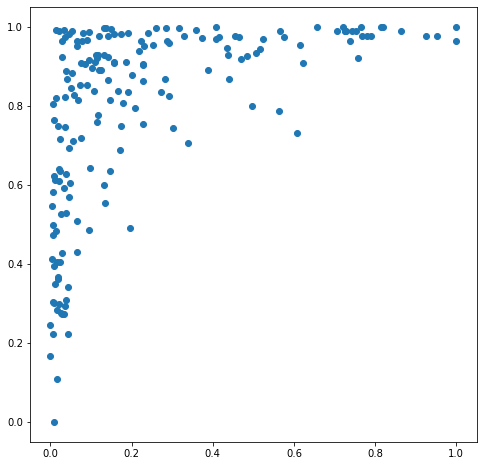

In [20]:
plot_clusters(data_scaled)

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


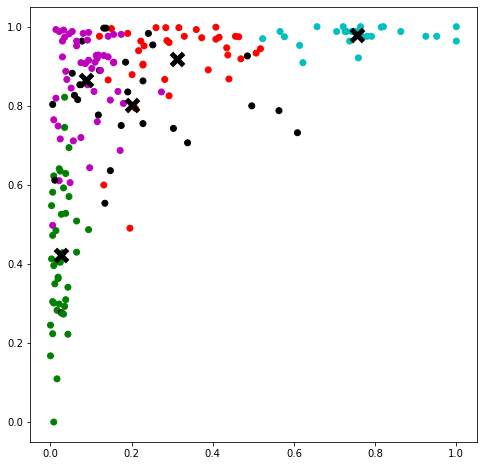

In [22]:
km = KMeans(init='random', n_clusters=5, random_state=RANDOM_STATE)
km.fit(data_scaled)
plot_clusters(data_scaled, km.labels_, km.cluster_centers_)

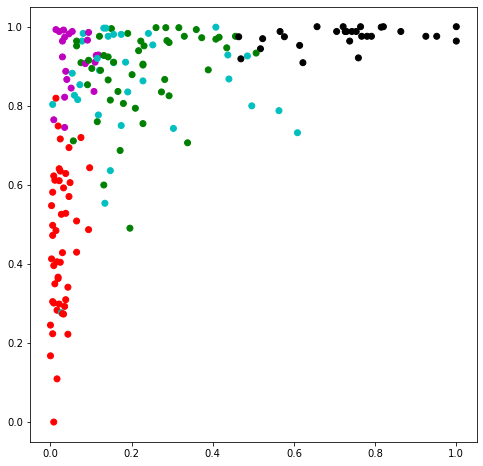

In [23]:
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
ag.fit(data_scaled)
plot_clusters(data_scaled, ag.labels_)


Después de aplicar clustering con numero de clusters=5, al visualizar con plot_clusters() obtendrás algo como esto:
![image.png](attachment:image.png)

    Nota: No puedo ver la imagen que propone

## 4) Encontrar el número óptimo de clusters

Como el número de clusters es un parámetro de entrada queremos decidir __razonadamente__ el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters. 

¿Qué número de clusters sería el óptimo según los diagramas anteriores?  RAZONA LA RESPUESTA.


In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

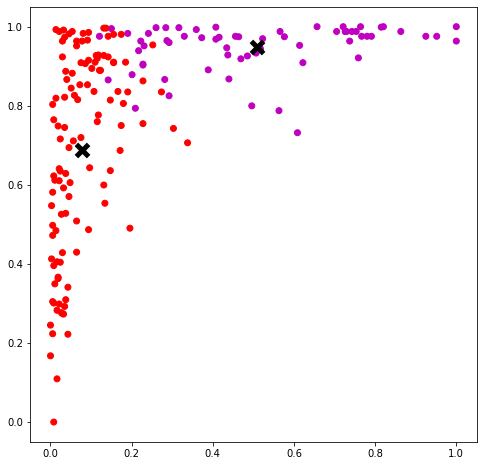

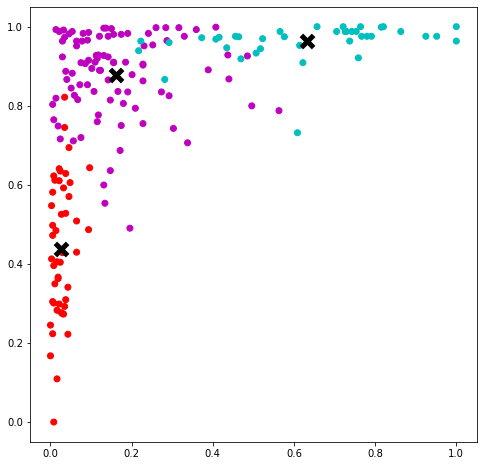

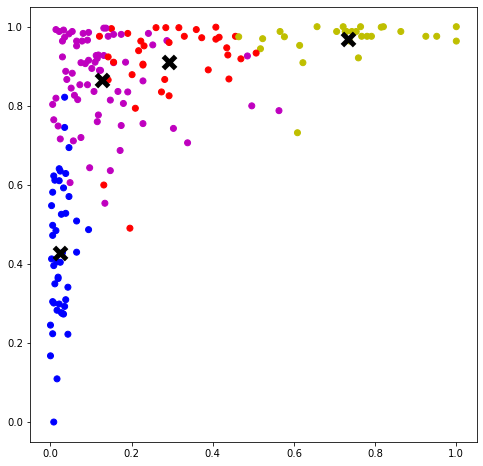

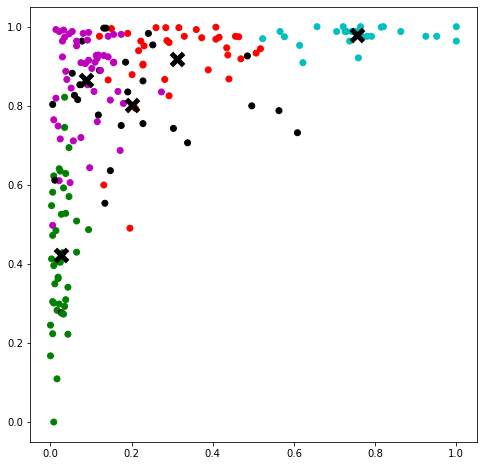

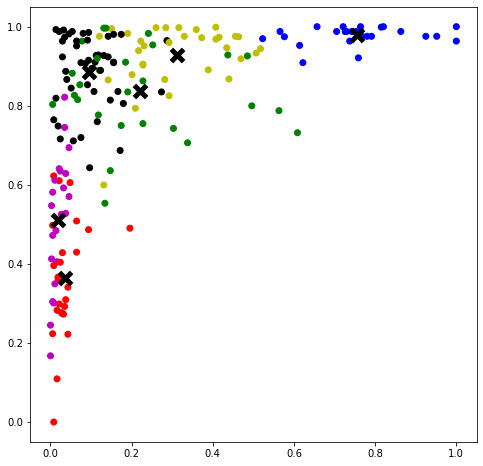

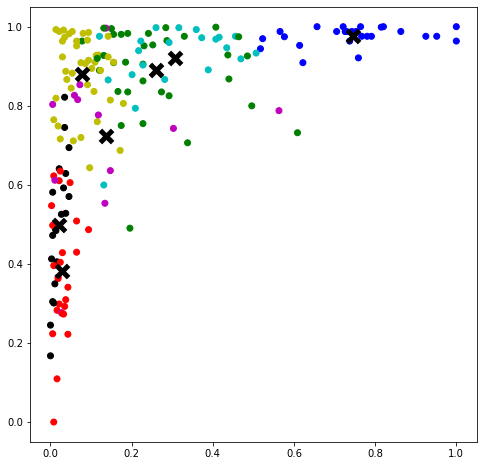

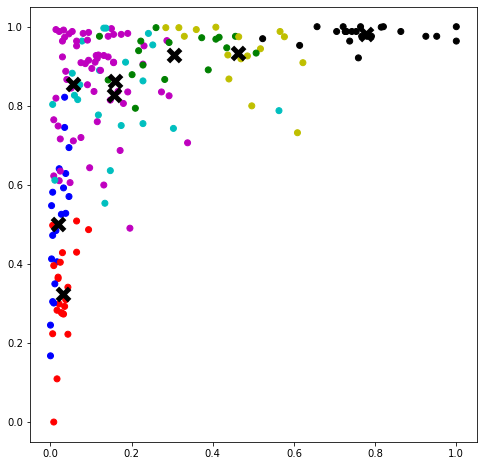

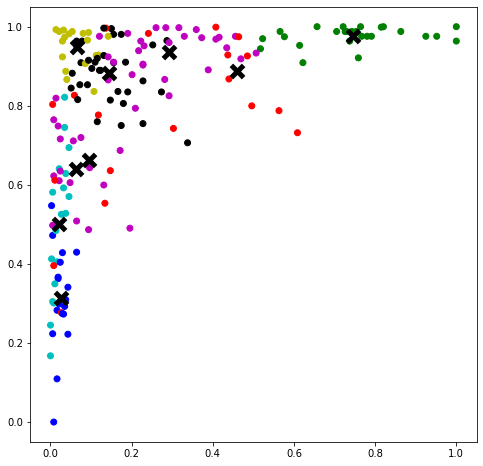

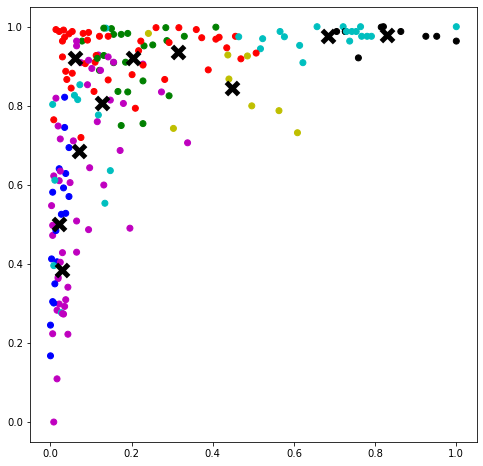

In [25]:
K_MAX = 11
davies = np.zeros(K_MAX-2)
dist = []
for k in range(2, K_MAX):
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(data_scaled)
    dist.append(km.inertia_)
    plot_clusters(data_scaled, km.labels_, km.cluster_centers_)
    davies[k-2] = davies_bouldin_score(data_scaled, km.labels_)

Text(0.5, 1.0, 'Diagrama de Codo')

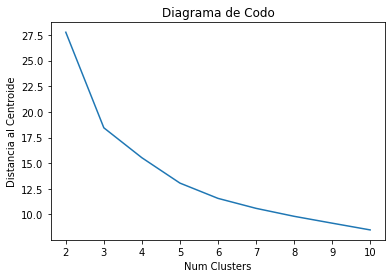

In [26]:
plt.plot(range(2, K_MAX),dist)
plt.xlabel('Num Clusters')
plt.ylabel('Distancia al Centroide')
plt.title('Diagrama de Codo')

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

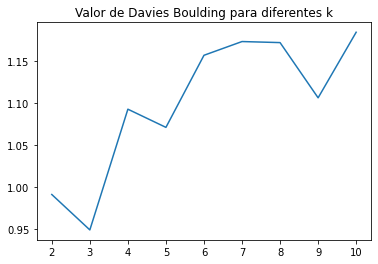

In [27]:
plt.plot(range(2, K_MAX), davies)
plt.title('Valor de Davies Boulding para diferentes k')

### Conclusión

Segun los grafos de los clusters al igual que los grafos del Diagrama de Codo y Valor de Davies Boulding, __el numero de clusters más óptimo es de 3__. En un principio, solo con verlos, se pueden descartar los grafos del 5-10, ya que agrupan los datos en tantos "mini" clusters que no es optimo al momento de considerar que 1) dichos "sub" clusters se pudieran agrupar y 2) están tan reducidos he intrelazados entre si que mas bien producen un "collage" (para no buscar otra palabra) no-uniforme capaz de distinguir los países similares (se hace mas dificil relacionarlos entre si).

El grafo de 4 clusters se ve mucho mejor que los demás, pero cuando nos enfocamos en el cluster _color rojo_, es tan pequeño y esta mucho mas cerca del cluster _color morado_ que no vale la pena considerarlos por separado (incluso el valor Davies Boulding es mucho más elevado que el de 3, dando a entender qe en comparación no es óptimo). Ahora, considerando el grafo de 2 clusters, a pesar de ser el segundo más óptimo, no se puede considerar ya que considerando la data de los países, puedo elegir a base de lógica que no se pueden clasificar segun la industria/sector de cada uno en dos grupos/clusters. 

El mejor es el de 3 clusters ya que si se se consideran los sectores de orientación de cada país (agricultura, servicios, industria), una gran mayoría no depende por completo de uno de estos; una gran mayoría de los países tienen diferentes grados/porcentajes de fiabilidad en cada sector, por lo que no podemos agruparlos directamente en un solo cluster, mucho menos dos (a menos que se considere el sector de agricultura como "insignificante" y borrar la columna de la tabla).

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Estudia al menos uno de los clusters a través de sus descriptores estadísticos.
Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. 
Como al principio hemos escalado los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. 
creamos una nueva columna para añadir la clase que le ha asignado el algoritmo a cada fila de la tabla de la siguiente forma:

    df = df.copy()
    df['cluster'] = km.labels_

In [28]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(data_scaled)

KMeans(init='random', n_clusters=3, random_state=333)

In [29]:
df = df.copy()
df['cluster'] = km.labels_

In [30]:
df.loc[df['cluster']==2]

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,2
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,2
Argentina,11200.0,97.1,220.4,0.095,0.358,0.547,2
Armenia,3500.0,98.6,195.7,0.239,0.343,0.418,2
Azerbaijan,3400.0,97.0,137.1,0.141,0.457,0.402,2
...,...,...,...,...,...,...,...
Uzbekistan,1700.0,99.3,62.9,0.342,0.229,0.430,2
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,2
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,2


In [31]:
df.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551,0.082496
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395,0.690982
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638,0.160158
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489,-0.530354
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413,0.327129
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000,0.204399
cluster,0.082496,0.690982,0.160158,-0.530354,0.327129,0.204399,1.000000


In [32]:
df.groupby(["cluster"]).describe().transpose()

cluster                             0             1             2
GDP ($ per capita) count    47.000000     40.000000     92.000000
                   mean   1480.851064  24092.500000   6523.913043
                   std     816.311508   7732.893030   4524.690981
                   min     500.000000   8600.000000    700.000000
                   25%     800.000000  17950.000000   3275.000000
                   50%    1300.000000  25900.000000   5450.000000
                   75%    1850.000000  29025.000000   9000.000000
                   max    4100.000000  37800.000000  21500.000000
Literacy (%)       count    47.000000     40.000000     92.000000
                   mean     53.589362     96.915000     89.920652
                   std      14.501683      3.872821      8.884504
                   min      17.600000     77.900000     58.000000
                   25%      42.300000     96.550000     85.025000
                   50%      52.900000     97.950000     92.250000
                   75%      65.950000     99.000000     97.350000
                   max      85.300000    100.000000     99.900000
Phones (per 1000)  count    47.000000     40.000000     92.000000
                   mean     17.148936    530.172500    165.720652
                   std      23.621378    138.167347    107.955035
                   min       0.200000    194.500000      3.700000
                   25%       3.600000    458.375000     75.075000
                   50%       9.700000    493.300000    141.500000
                   75%      19.550000    590.025000    260.525000
                   max     131.800000    898.000000    463.800000
Agriculture        count    47.000000     40.000000     92.000000
                   mean      0.340723      0.027450      0.119283
                   std       0.149452      0.019916      0.084219
                   min       0.073000      0.000000      0.002000
                   25%       0.243500      0.010750      0.058000
                   50%       0.322000      0.021500      0.099500
                   75%       0.424500      0.040000      0.164000
                   max       0.769000      0.086000      0.370000
Industry           count    47.000000     40.000000     92.000000
                   mean      0.232468      0.245600      0.334859
                   std       0.118078      0.115622      0.145356
                   min       0.040000      0.032000      0.088000
                   25%       0.167500      0.175000      0.229750
                   50%       0.204000      0.252000      0.311000
                   75%       0.281500      0.298000      0.412250
                   max       0.666000      0.585000      0.906000
Service            count    47.000000     40.000000     92.000000
                   mean      0.426936      0.726675      0.544826
                   std       0.124527      0.119561      0.134877
                   min       0.177000      0.375000      0.062000
                   25%       0.351500      0.671000      0.445000
                   50%       0.406000      0.729000      0.551500
                   75%       0.542000      0.780000      0.640750
                   max       0.643000      0.954000      0.818000

In [33]:
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,0
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,2
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,2
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,1
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743,1
...,...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,2
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,2
Yemen,800.0,50.2,37.2,0.135,0.472,0.393,0


<AxesSubplot:xlabel='Service', ylabel='GDP ($ per capita)'>

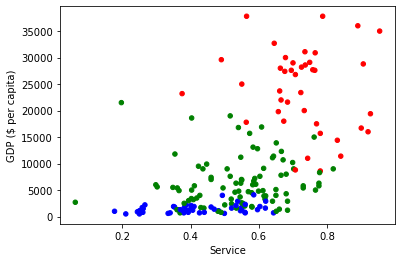

In [34]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green' }
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='Service', y='GDP ($ per capita)',c=colors)

<AxesSubplot:xlabel='Industry', ylabel='GDP ($ per capita)'>

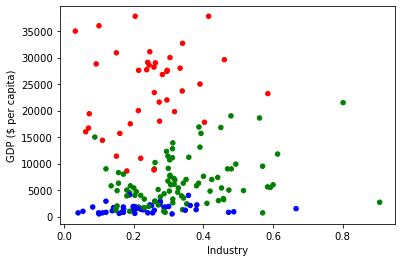

In [35]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green' }
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='Industry', y='GDP ($ per capita)',c=colors)

<AxesSubplot:xlabel='Agriculture', ylabel='GDP ($ per capita)'>

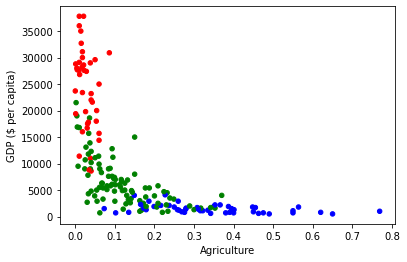

In [36]:
dic_colors = { 0: 'blue', 1: 'red', 2: 'green' }
colors = df['cluster'].map(dic_colors)

df.plot.scatter(x='Agriculture', y='GDP ($ per capita)',c=colors)

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

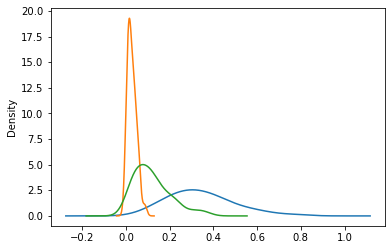

In [37]:
df.groupby(["cluster"])["Agriculture"].plot(kind='density')

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

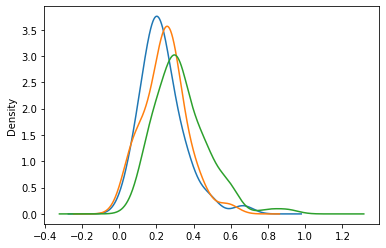

In [38]:
df.groupby(["cluster"])["Industry"].plot(kind='density')

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

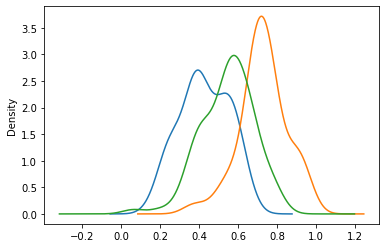

In [39]:
df.groupby(["cluster"])["Service"].plot(kind='density')

In [40]:
df['cluster'] = df['cluster'].astype('category')

array([[<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Literacy (%)', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Phones (per 1000)', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Industry', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Service', ylabel='GDP ($ per capita)'>],
       [<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Literacy (%)', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Phones (per 1000)', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Industry', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Service', ylabel='Literacy (%)'>],
       [<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>,
        <AxesSubplot:xlabel='Literacy (%)', ylabel='Phones (per 1

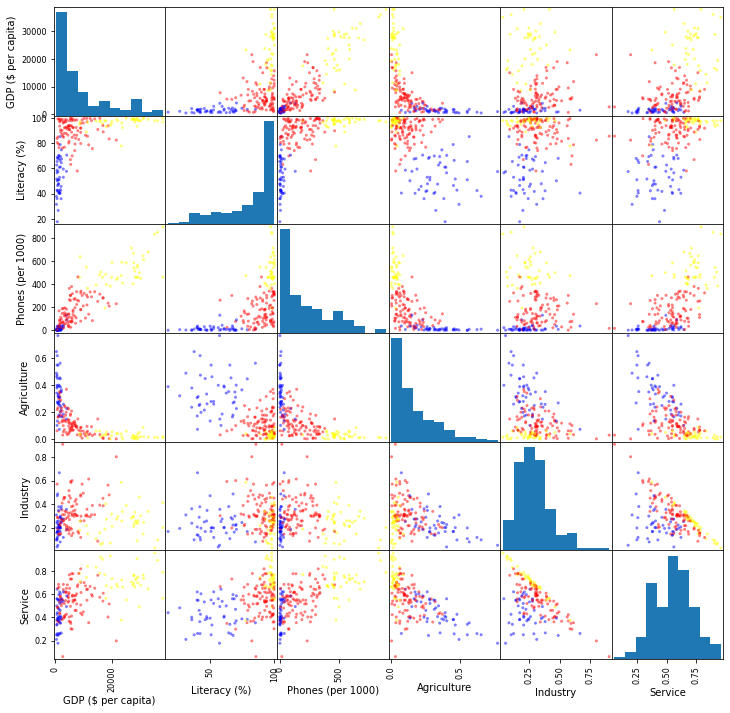

In [41]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 0: 'blue', 1: 'yellow', 2 :'red'}
colors = df['cluster'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

# Parte 2: Clasificación

Para esta segunda parte vamos a usar un conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.


In [42]:
Cle_csv = pd.read_csv('cleveland.csv')

In [43]:
Cle_csv

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [44]:
Cle_csv['sex'] = Cle_csv['sex'].astype('category')
Cle_csv['cp'] = Cle_csv['cp'].astype('category')
Cle_csv['thal'] = Cle_csv['thal'].astype('category')
Cle_csv['exang'] = Cle_csv['exang'].astype('category')
Cle_csv['fbs'] = Cle_csv['fbs'].astype('category')
Cle_csv['restecg'] = Cle_csv['restecg'].astype('category')
Cle_csv['slope'] = Cle_csv['slope'].astype('category')
Cle_csv['ca'] = Cle_csv['ca'].astype('category')
Cle_csv['target'] = Cle_csv['target'].astype('category')

In [45]:
Cle_csv = Cle_csv.dropna(axis=0)

In [46]:
Cle_csv

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [47]:
aux = Cle_csv['target']
Cle_csv['status'] = aux.map({0: 'normal', 1: 'enfermo', 2: 'enfermo', 3: 'enfermo', 4: 'enfermo'})
Cle_csv

/var/folders/42/k0333_056k56_th3b_jxr8vm0000gn/T/ipykernel_28297/1797004899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cle_csv['status'] = aux.map({0: 'normal', 1: 'enfermo', 2: 'enfermo', 3: 'enfermo', 4: 'enfermo'})


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,enfermo


In [48]:
Cle_csv.describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [49]:
Cle_csv['status'].value_counts()

normal     160
enfermo    137
Name: status, dtype: int64

In [50]:
Cle_csv['status'].value_counts() / Cle_csv['status'].count() * 100

normal     53.872054
enfermo    46.127946
Name: status, dtype: float64

La clase `normal` es mucho más frecuente que la `enfermo`, al igual que es más común (aproximadamente 1/5 a 9/20). Ya que las clases no están balanceadas, se debería de contemplar este hecho si se plantea realizar una validación cruzada de ambos datos, lo que sería rentable considerando que no disponemos de una gran cantidad de datos y solo tenemos dos clases.

In [51]:
Cle_csv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [52]:
Cle_csv['age']

0      63.0
1      67.0
2      67.0
3      37.0
4      41.0
       ... 
297    57.0
298    45.0
299    68.0
300    57.0
301    57.0
Name: age, Length: 297, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalach'>,
        <AxesSubplot:xlabel='trestbps', ylabel='thalach'>,
        <AxesSubplot:xlabel='chol', ylabel='thalach'>,
       

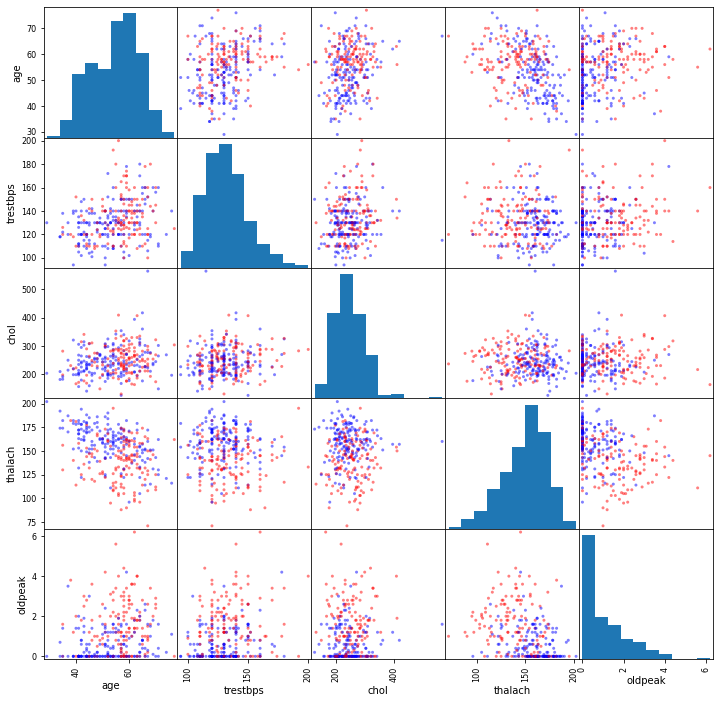

In [53]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 'normal': 'blue', 'enfermo': 'red'}
colors = Cle_csv['status'].map(dic_colors)

scatter_matrix(Cle_csv, figsize = (12, 12), diagonal = 'hist', c=colors)

Aquí se puede ver que los resultados estan increiblemente dispersos en varios de los grafos, como por ejemplo la relación entre `chol` y `trestbps` donde los valores están tan intercalados que resulta casi imposible a simple vista en ver observar los valores y grupos que estos forman, lo que me hace pensar que la cantidad de colesterol y la presión alterial estan altamente relacionados, independientemente si el paciente está enfermo o no. Por otro lado, la relación entre `oldpeak` y `thalach` da una imagen mas clara de los grupos, y que podemos dicernir mejor una gran cantidad de pacientes enfermos. Ambas variables estan fuertemente relacionadas, ya que `oldpeak` hace referencia a la depression que sufre el corazon al momento de hacer deporte, y `thalach` es el heart rate maximo al que puede alcanzar el corazon, de forma que si el paciente hace ejercicio y este sufre de una enfermedad, entonces se puede notar que la depresión es mas alta mientras que sus pulsaciones son muy bajas.

Al momento de resolver este problema, no va a resultar sencillo debido a que muchos de los valores de clasificación estan bastante intercalados con unas pocas excepciones, dando lugar grandes valores de desorden (entropía). Lo que lo "salva" es el hecho de que se tienen dos clases, de forma que los computos no serían tan grandes/extensos como lo serían con 3 o 5.

## 3) Crea el modelo de árbol de decisión con profundidad 3

Si se construye el árbol completo se puede producir sobreaprendizaje. 
Aunque no lo vamos a hacer, podemos calcular con validación cruzada cual es la profundidad óptima.
Entrenando y validandos varios árboles con distintas profundidades máximas

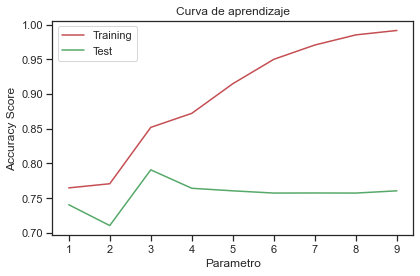
En el gráfico se ve que el mejor valor de profundidad para evitar el sobreaprendizaje es 3.

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. 


Analiza razonadamente:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

Nota: Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. 
Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`)
y otro array que sólo contenga la variable de salida. Estos dos arrays son los dos parámetros que necesita el .fit() del modelo de clasificación con el árbol de decisión.

    X = df.drop(['target'], axis=1).values
    Y = df['target'].values

In [54]:
Datos_Train = Cle_csv.drop(['target'], axis=1).values
Datos = Cle_csv.drop(['target','status'], axis=1).values
Var_Exit = Cle_csv['target'].values

In [55]:
Cle_csv.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'status'],
      dtype='object')

In [56]:
Feature_Names = Cle_csv.keys().drop(['target','status'])
Feature_Names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [57]:
Class_Names = Cle_csv.keys().drop(Cle_csv.keys().difference(['status']))
#Class_Names = Cle_csv.keys().drop(Cle_csv.keys().difference(['target']))
Class_Names

Index(['status'], dtype='object')

In [58]:
Cle_csv[Class_Names]

,status
0,normal
1,enfermo
2,enfermo
3,normal
4,normal
...,...
297,enfermo
298,enfermo
299,enfermo
300,enfermo


In [59]:
Datos_Train

array([[63.0, 1.0, 1.0, ..., 0.0, 6.0, 'normal'],
       [67.0, 1.0, 4.0, ..., 3.0, 3.0, 'enfermo'],
       [67.0, 1.0, 4.0, ..., 2.0, 7.0, 'enfermo'],
       ...,
       [68.0, 1.0, 4.0, ..., 2.0, 7.0, 'enfermo'],
       [57.0, 1.0, 4.0, ..., 1.0, 7.0, 'enfermo'],
       [57.0, 0.0, 2.0, ..., 1.0, 3.0, 'enfermo']], dtype=object)

In [60]:
Datos

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

In [61]:
Var_Exit

[0, 2, 1, 0, 0, ..., 1, 1, 2, 3, 1]
Length: 297
Categories (5, int64): [0, 1, 2, 3, 4]

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
desTree = DecisionTreeClassifier(random_state=RANDOM_STATE)
desTree = desTree.fit(Datos, Var_Exit)

In [64]:
from sklearn.tree import plot_tree as tree


In [65]:
import matplotlib.pyplot as plt


IndexError: index 2 is out of bounds for axis 0 with size 1

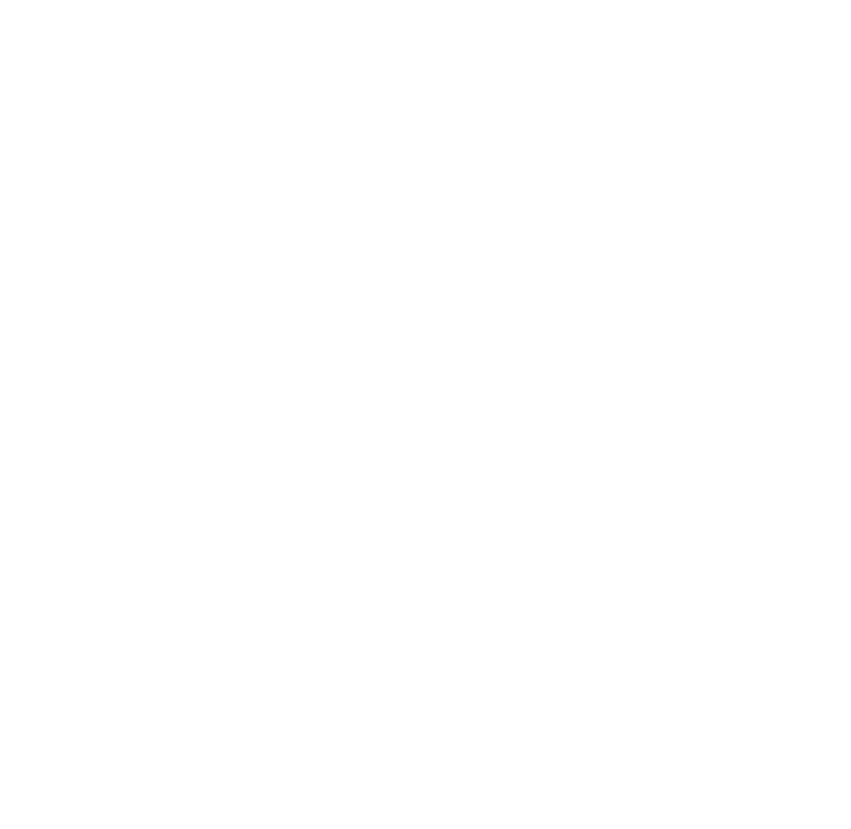

In [230]:

plt.figure(figsize=(15,15))
tree(desTree, filled=True, feature_names=Feature_Names, class_names= Class_Names, rounded=True)
plt.show()

## 4) Estudia el error de clasificación de este árbol 

Vamos a calcular la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol (3) y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

# Parte 3: Regresión

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es **entrenar una red neuronal** capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos dado `airbnb.csv` en un dataframe. Describe el conjunto de datos y estudia la distribución de precios.

- `accommodates`: número máximo de personas permitido.
- `bathrooms` y `bedrooms`: baño y dormitorios.
- `guests_included`: inquilinos incluidos en el precio, por encima hay que pagas un extra.
- `host_listings_count`: número de establecimientos alquilados por el mismo propietario.
- `latitude`y `longitude`: situación geográfica.
- `minimum_nights`: mínimo número de noches que se pueden alquilar.
- `number_of_reviews`: números de comentarios en la plataforma de anteriores inquilinos.
- `distance_centre`: distancia al centro de la ciudad.
- `instant_bookable`: si se puede reservar directamente en la web.
- `entire_home`, `private_room` y `shared_room`: casa entera, habitación o habitación compartida.

In [152]:
bnb_csv = pd.read_csv('airbnb.csv')
bnb_csv

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [133]:
bnb_csv.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


In [134]:
bnb_csv['price'].describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='distance_centre', ylabel='price'>

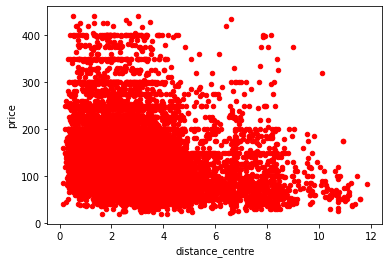

In [119]:
bnb_csv.plot.scatter(x='distance_centre', y='price', c='Red')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

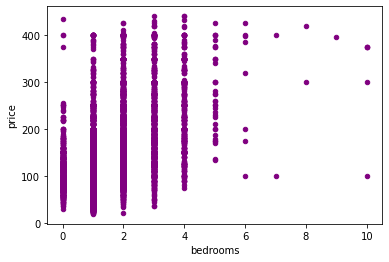

In [120]:
bnb_csv.plot.scatter(x='bedrooms', y='price', c='Purple')

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

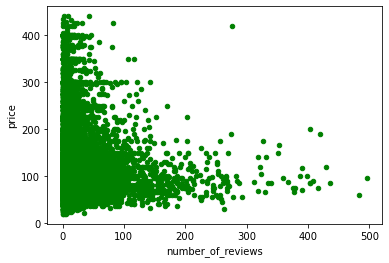

In [121]:
bnb_csv.plot.scatter(x='number_of_reviews', y='price', c='Green')

<AxesSubplot:xlabel='instant_bookable', ylabel='price'>

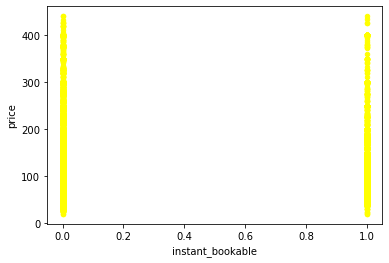

In [122]:
bnb_csv.plot.scatter(x='instant_bookable', y='price', c='Yellow')

<AxesSubplot:xlabel='host_listings_count', ylabel='price'>

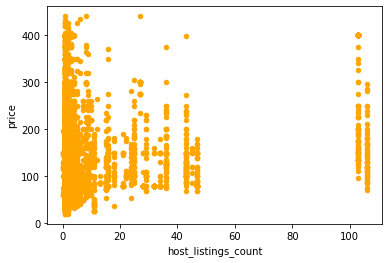

In [123]:
bnb_csv.plot.scatter(x='host_listings_count', y='price', c='Orange')

En un principio quise observar la relación entre la distancia del centro de la ciudad con el precio, ya que estando familiarizado con la aplicación, los precios suelen ser mas altos cuanto mas cerca del centro estas. Efectivamente la mayoría de las viviendas estan cerca del centro, y si se observa la evolución del precio, vemos que las viviendas con precios más caros tienden a estar cerca del centro, por lo que a medida que el precio crece la distancia del centro decrece. 

Por otro lado, quise ver si el número de habitaciones influía en el precio, y la verdad es que varía mucho para decir que de verdad es influenciado salvo unas pocas excepciones. Lo mismo pasó con el número de reviews, ya que para mi sorpresa resultó que mientras más reviews tenía una vivienda, más barata es. 

El hecho de que se puede reservar instantaneamente tampoco tiene efecto, pero cuando se compara el monto de viviendas que poseé el host, se puede notar que mientras más viviendas más baratas son. Con notables excepciones. 

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. 
Vamos a crear un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa). Será este dataframe el que utilizaremos después. 


In [160]:
bnb_csv

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [168]:
cR=bnb_csv.corr()

cR[abs(cR['price']) >= 0.2]['price'][:-1]

accommodates       0.552183
bathrooms          0.283759
bedrooms           0.517237
guests_included    0.338739
distance_centre   -0.204698
entire_home        0.361313
private_room      -0.357184
Name: price, dtype: float64

In [154]:
suBnb = bnb_csv.loc[:, ['price','accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'distance_centre', 'entire_home', 'private_room']]

In [157]:
suBnb

,price,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room
0,160.0,4,2.0,2.0,1,3.279483,1,0
1,120.0,4,1.0,2.0,2,5.951843,1,0
2,99.0,2,1.0,1.0,1,2.601055,1,0
3,100.0,2,1.0,1.0,1,1.095138,0,1
4,175.0,2,1.0,1.0,1,0.844491,1,0
...,...,...,...,...,...,...,...,...
14993,140.0,2,1.0,1.0,1,1.815773,1,0
14994,120.0,4,1.0,2.0,1,5.687407,1,0
14995,120.0,2,1.0,1.0,1,1.620395,1,0
14996,95.0,3,1.0,1.0,1,1.777881,1,0


In [91]:
df = bnb_csv

In [166]:
# ANTES DE ENTRENAR LA RED VAMOS A ESCALAR LOS DATOS CON EL SIGUIENTE CÓDIGO
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['price'], axis=1).values
Y = df['price'].values

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X_scaled=scaler_x.transform(X)

# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(Y.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
Y_scaled=scaler_y.transform(Y.reshape(-1, 1))

## 3) Entrenamiento 

Crea una red neuronales de tipo Perceptrón Multicapa con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. 
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).



In [224]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

regul_param_range = 20.0 ** -np.arange(1, 11)
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, 2), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, X_scaled, Y_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.01173924460378951,
  -0.022980830406542137,
  -0.022980836703469096,
  -0.02298083670708109,
  -0.022980836707121838,
  -0.022980836707123847,
  -0.022980836707123947,
  -0.022980836707123954,
  -0.022980836707123954,
  -0.022980836707123954],
 [0.00030989637125621,
  0.0006304270900311271,
  0.0006304217537955565,
  0.0006304217504699839,
  0.000630421750427963,
  0.0006304217504258389,
  0.0006304217504257329,
  0.0006304217504257288,
  0.0006304217504257284,
  0.0006304217504257284])

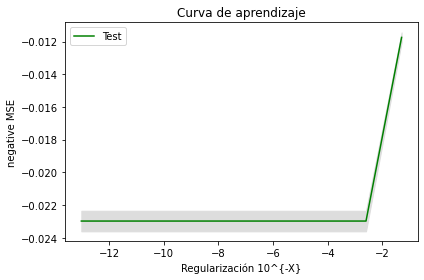

In [225]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Alteré el código para usar el `regul_param_range` con valores derivados del 2 en vez de 1, de forma que la `alpha` obtuvo valores desde 0.2 hasta 0.00000000002, ya que despues de varios ensayos, concluí que el mejor valor era 10. Esto es porque, la curva de apredizaje va hacia un mayor mayor mucho más rápido y se situa en una regularización de 10^-2, mientras que incrementando el valor daba a lugar a 10^-2.8 o decrementandolo daba lugar a ún valor mas grande.

## 4) Medición del error

Con el modelo fijando el coeficiente de regulación decidido en el apartado anterior usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Dibuja un histograma con la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [226]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(100, 2), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, X_scaled, Y_scaled.ravel(), cv=5)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1,1))

In [227]:
errors = np.abs(Y - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(Y)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 52.31355626335598
Desviación típica: 47.49277211954928
Error medio en %: 40.22564113695366


Según el calculo del error, el precio medio en euros es de 52, con un porcentaje de 40%. Ahora, la desviación típica es bastante grande, a tal punto de que casi mitad de los precios/resultados serán erroneamente predichos. Después de probarlo cambiando la `alpha`, esto siempre llega a estos cálculos sin importar si la curva de aprendizaje difiere un poco, por lo que puedo inferir que los datos, mas no el metodo de predicción, no proveén mucha información consistente/constante como para seguramente predecir su futura tendencia. Así que el 40% que obtenemos es altamente probable que no es un buen resultado 

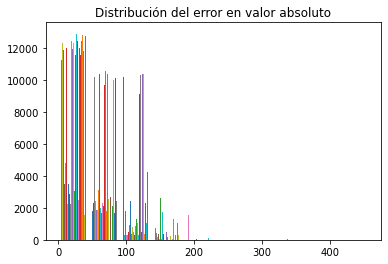

In [229]:
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

En contraste con la distribución de valores a la izquierda del grafo, los valores que preceden esa aglomeración son increíblemente altos, respaldando mi inferencia anterior de que la mayoría de los valores serán equivocados. Puedo ver que algunos errores son bastante pequeños, así que en su totalidad no se puede decir que es inpreciso.

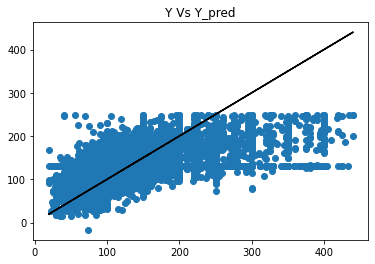

In [228]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(Y, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(Y, Y, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Aquí es mas aparente el error, ya que fielmente predice con cierto grado de precisión la "mitad" de los valores, pero cuando llega a los 200 produce una desviación exagerada de los valores, sin mencionar que al principio varios de los precios menor a 100 se desvian. En general, pienso que los errores se deben a la incosistensia de los datos. A esto me refiero, y solo yo observando las primeras viviendas luego de establecer el nuevo DF con los valores de correlación, es que se puede tener viviendas muy similares a un precio totalmente diferente mediante muchos factores. Entonces, a mi parecer, siento que con la cantidad de variables que se usan para definir el precio de una vivienda, ya sea distancia del centro o cuantas personas puede acomodar, merece tener mas neuronas y/o layers de los que ya usamos. Menciono esto porque la red pudo predecir con un grado de presición mitad de los valores, y como probé distintos valores para `alpha` al igual que un cierto número de iteraciones, la red debería funcionar mucho mejor si le damos mas "espacio" de entrenamiento en primer lugar.